# Ensemble of models

`VotingClassifier`. Розглянути різні значення `voting` та `weights`.<br>


### Початкові дані:
(a) `sklearn.datasets.samples_generator.make_circles`<br>
    `X, y = make_circles(noise=0.2, factor=0.5, random_state=1)`

In [54]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.inspection import DecisionBoundaryDisplay

from mlxtend.evaluate import bias_variance_decomp

import time

In [55]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

### 1. Представити початкові дані графічно:

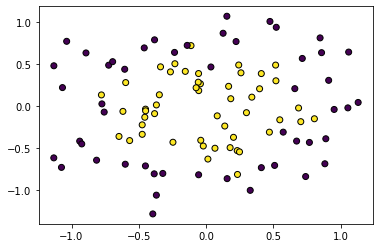

In [56]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k');

### 2. Розбити дані на навчальний, валідаційний та тестовий набори:

In [57]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=1)

### 3. Побудувати ансамблі моделей:

In [58]:
estimators = [('KNN1', KNN(weights='distance', n_neighbors=6)),
              ('KNN2', KNN(weights='distance')),
              ('KNN3', KNN(weights='uniform', algorithm='brute'))]

VotWS = VotingClassifier(estimators=estimators, weights=[4.4, 2, 1], voting='soft')
VotH = VotingClassifier(estimators=estimators, voting='hard')

In [59]:
VotWS.fit(X_train, y_train)
VotH.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN1',
                              KNeighborsClassifier(n_neighbors=6,
                                                   weights='distance')),
                             ('KNN2', KNeighborsClassifier(weights='distance')),
                             ('KNN3', KNeighborsClassifier(algorithm='brute'))])

### 4. Границі рішень:

In [75]:
def show_boundary(eclf, X, y, estimators):
    fig, axes = plt.subplots(ncols=4, figsize=(12,3))
    
    for i, estimator in enumerate(estimators+[('VotClf', eclf)]):
        DecisionBoundaryDisplay.from_estimator(
        estimator[1], X, alpha=0.4, ax=axes[i], response_method="predict"
        )
        axes[i].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
        axes[i].set_title(estimator[0])

In [76]:
for estimator in estimators:
    estimator[1].fit(X_train, y_train)

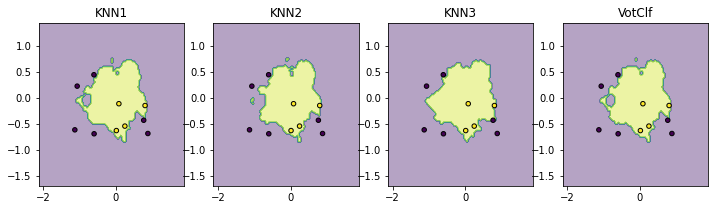

In [77]:
show_boundary(VotWS, X_valid, y_valid, estimators)

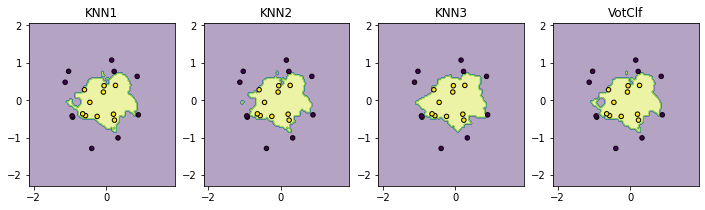

In [78]:
show_boundary(VotWS, X_test, y_test, estimators)

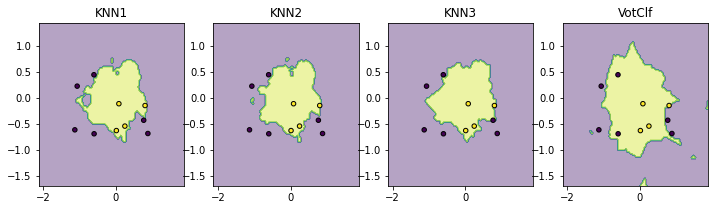

In [79]:
show_boundary(VotH, X_valid, y_valid, estimators)

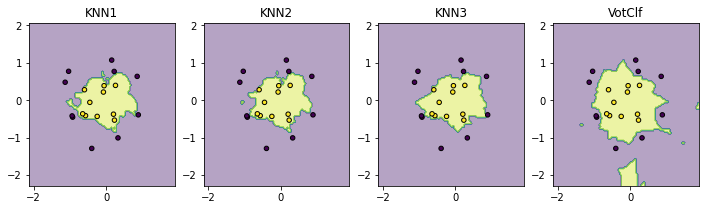

In [80]:
show_boundary(VotH, X_test, y_test, estimators)

### 5. Розрахувати значення зміщення та дисперсії:

In [81]:
for estimator in estimators + [('VotWS', VotWS)]:
    print(f'{estimator[0]}:')
    avg_loss, avg_bias, avg_variance = bias_variance_decomp(
        estimator[1], X_train, y_train, X_test, y_test, random_seed=1
    )
    print(f'bias: {avg_bias}\nvariance: {avg_variance}\n')

KNN1:
bias: 0.0
variance: 0.0985

KNN2:
bias: 0.0
variance: 0.10199999999999998

KNN3:
bias: 0.0
variance: 0.12075000000000002

VotWS:
bias: 0.0
variance: 0.10325



### 6. Час навчання:

In [82]:
start_time = time.time()
estimators[0][1].fit(X_train, y_train)
print(f'Train time: {time.time() - start_time}')

Train time: 0.0073964595794677734


In [83]:
start_time = time.time()
VotWS.fit(X_train, y_train)
print(f'Train time: {time.time() - start_time}')

Train time: 0.012533187866210938


Як бачимо, ансамбль навчається все ж довше, ніж окрема модель ансамблю.

### Висновки
Завдяки ансамблям ми отримали хороші результати моделі швидше, ніж на тренування однієї моделі, оскільки нам не довелось довго підбирати гіперпараметри для окремої моделі.